#  Импортируем необходимые либы

In [1]:
import pandas as pd 
import numpy as np 
import os
import cv2
import math

In [2]:
dir_files = os.listdir(".")
dir_files

['Classification_library.py',
 'pp_tool.py',
 'Cystine',
 'type_plasma_model.pth',
 'Uric acid',
 'averaged_model.pth',
 'lol.py',
 'Unclass',
 '__pycache__',
 'test_df.xlsx',
 'Unclass_df.xlsx',
 'Calcium',
 'Classification_library.py:Zone.Identifier',
 'Prediction_tool.py',
 'temp_fold_0.pth',
 'o',
 'обучение_типу_камня_по_plasma.ipynb',
 'p_tool.py',
 'best_model.pth',
 'Prediction_tool.py:Zone.Identifier']

# функция для поиска в глубину png файлов

In [3]:
def get_png_files(path='.'):
    png_files = []
    
    def dfs_search(current_path):
        try:
            for entry in os.listdir(current_path):
                full_path = os.path.join(current_path, entry)
                if os.path.isfile(full_path):
                    if full_path.lower().endswith('.png'):
                        png_files.append(full_path)
                elif os.path.isdir(full_path):
                    dfs_search(full_path)
        except PermissionError:
            pass  #пропускаем директории, к которым нет доступа
    
    dfs_search(path)
    return png_files

# Цистиновые

In [4]:
Cystine_files = get_png_files('Cystine')
print(f"Found {len(Cystine_files)} PNG files:")

Found 409 PNG files:


# Урататные

In [5]:
os.listdir("Uric acid")

['Pure uric acid', 'Uric acid with calcium']

In [6]:
Uric_acid_files = get_png_files('Uric acid/Pure uric acid')
print(f"Found {len(Uric_acid_files)} PNG files:")

Found 3274 PNG files:


In [7]:
Uric_acid_calcium_files = get_png_files('Uric acid/Uric acid with calcium')
print(f"Found {len(Uric_acid_calcium_files)} PNG files:")

Found 692 PNG files:


# Неклассифицированные

In [8]:
Unclass_files = get_png_files('Unclass')
print(f"Found {len(Unclass_files)} PNG files:")

Found 4207 PNG files:


# Кальциевые

In [9]:
Calcium_files = get_png_files('Calcium')
print(f"Found {len(Calcium_files)} PNG files:")

Found 7144 PNG files:


In [10]:
# функция по прочистке от сплошных изображений
def del_solid_color_images(path):
    image = cv2.imread(path)
    if image is None:
        return 0
        
    # Проверяем, все ли пиксели одинаковы в каждом канале
    if len(image.shape) == 3:  # Цветное изображение (BGR)
        b, g, r = cv2.split(image)
        if (
            np.all(b == b[0,0]) and 
            np.all(g == g[0,0]) and 
            np.all(r == r[0,0])
        ):
            os.remove(path)
            return 1
    
    # Для одноканальных изображений (оттенки серого)
    elif len(image.shape) == 2:  
        if np.all(image == image[0,0]):
            os.remove(path)
            return 1
            
    return 0

# Цистиновые

In [11]:
Cystine_files_del_count = 0

for path in Cystine_files:
    Cystine_files_del_count += del_solid_color_images(path=path)

Cystine_files_del_count

0

In [12]:
Cystine_files = get_png_files('Cystine')
print(f"Found {len(Cystine_files)} PNG files:")

Found 409 PNG files:


In [13]:
Cystine_df = pd.DataFrame(columns=["Path", "Type"])
Cystine_df["Path"] = Cystine_files
Cystine_df["Type"] = "Cystine"
Cystine_df

,Path,Type
0,Cystine/Stone 36/36_570_plasma.png,Cystine
1,Cystine/Stone 36/36_530_plasma.png,Cystine
2,Cystine/Stone 36/10036_1000_plasma.png,Cystine
3,Cystine/Stone 36/10036_500_plasma.png,Cystine
4,Cystine/Stone 36/10036_510_plasma.png,Cystine
...,...,...
404,Cystine/Stone 153/153_210_plasma.png,Cystine
405,Cystine/Stone 153/10153_210_plasma.png,Cystine
406,Cystine/Stone 153/10153_70_plasma.png,Cystine
407,Cystine/Stone 153/153_830_plasma.png,Cystine


# Урататные

In [14]:
Uric_acid_files_del_count = 0

for path in Uric_acid_files:
    Uric_acid_files_del_count += del_solid_color_images(path=path)

Uric_acid_files_del_count
    

0

In [15]:
Uric_acid_files = get_png_files('Uric acid/Pure uric acid')
print(f"Found {len(Uric_acid_files)} PNG files:")

Found 3274 PNG files:


In [16]:
Uric_acid_df = pd.DataFrame(columns=["Path", "Type"])
Uric_acid_df["Path"] = Uric_acid_files
Uric_acid_df["Type"] = "Uric acid"
Uric_acid_df

,Path,Type
0,Uric acid/Pure uric acid/Stone 33/10033_1270_p...,Uric acid
1,Uric acid/Pure uric acid/Stone 33/10033_910_pl...,Uric acid
2,Uric acid/Pure uric acid/Stone 33/10033_1470_p...,Uric acid
3,Uric acid/Pure uric acid/Stone 33/10033_1740_p...,Uric acid
4,Uric acid/Pure uric acid/Stone 33/10033_1080_p...,Uric acid
...,...,...
3269,Uric acid/Pure uric acid/Stone 13/10013_2036_p...,Uric acid
3270,Uric acid/Pure uric acid/Stone 13/10013_1787_p...,Uric acid
3271,Uric acid/Pure uric acid/Stone 13/10013_161_pl...,Uric acid
3272,Uric acid/Pure uric acid/Stone 13/10013_2225_p...,Uric acid


In [17]:
Uric_acid_calcium_files_del_count = 0

for path in Uric_acid_calcium_files:
    Uric_acid_calcium_files_del_count += del_solid_color_images(path=path)

Uric_acid_calcium_files_del_count

0

In [18]:
Uric_acid_calcium_files = get_png_files('Uric acid/Uric acid with calcium')
print(f"Found {len(Uric_acid_calcium_files)} PNG files:")

Found 692 PNG files:


In [19]:
Uric_acid_calcium_df = pd.DataFrame(columns=["Path", "Type"])
Uric_acid_calcium_df["Path"] = Uric_acid_calcium_files
Uric_acid_calcium_df["Type"] = "Uric acid calcium"
Uric_acid_calcium_df

,Path,Type
0,Uric acid/Uric acid with calcium/Stone 32/1003...,Uric acid calcium
1,Uric acid/Uric acid with calcium/Stone 32/1003...,Uric acid calcium
2,Uric acid/Uric acid with calcium/Stone 32/1003...,Uric acid calcium
3,Uric acid/Uric acid with calcium/Stone 32/1003...,Uric acid calcium
4,Uric acid/Uric acid with calcium/Stone 32/1003...,Uric acid calcium
...,...,...
687,Uric acid/Uric acid with calcium/Stone 28/1002...,Uric acid calcium
688,Uric acid/Uric acid with calcium/Stone 28/1002...,Uric acid calcium
689,Uric acid/Uric acid with calcium/Stone 28/1002...,Uric acid calcium
690,Uric acid/Uric acid with calcium/Stone 28/1002...,Uric acid calcium


# Неклассифицированные

In [20]:
Unclass_files_del_count = 0

for path in Unclass_files:
    Unclass_files_del_count += del_solid_color_images(path=path)

Unclass_files_del_count

0

In [21]:
Unclass_files = get_png_files('Unclass')
print(f"Found {len(Unclass_files)} PNG files:")

Found 4207 PNG files:


In [22]:
Unclass_df = pd.DataFrame(columns=["Path", "Type"])
Unclass_df["Path"] = Unclass_files
Unclass_df["Type"] = "Unclass"
Unclass_df

,Path,Type
0,Unclass/Stone 37/10037_760_plasma.png,Unclass
1,Unclass/Stone 37/10037_1110_plasma.png,Unclass
2,Unclass/Stone 37/10037_1060_plasma.png,Unclass
3,Unclass/Stone 37/10037_1490_plasma.png,Unclass
4,Unclass/Stone 37/10037_1450_plasma.png,Unclass
...,...,...
4202,Unclass/Stone 82/10082_750_plasma.png,Unclass
4203,Unclass/Stone 82/10082_1540_plasma.png,Unclass
4204,Unclass/Stone 82/10082_560_plasma.png,Unclass
4205,Unclass/Stone 82/10082_500_plasma.png,Unclass


# Кальциевые

In [23]:
Calcium_files_del_count = 0

for path in Calcium_files:
    Calcium_files_del_count += del_solid_color_images(path=path)

Calcium_files_del_count

0

In [24]:
Calcium_files = get_png_files('Calcium')
print(f"Found {len(Calcium_files)} PNG files:")

Found 7144 PNG files:


In [25]:
Calcium_df = pd.DataFrame(columns=["Path", "Type"])
Calcium_df["Path"] = Calcium_files
Calcium_df["Type"] = "Calcium"
Calcium_df

,Path,Type
0,Calcium/Stone 52/10052_570_plasma.png,Calcium
1,Calcium/Stone 52/10052_580_plasma.png,Calcium
2,Calcium/Stone 52/10052_790_plasma.png,Calcium
3,Calcium/Stone 52/10052_710_plasma.png,Calcium
4,Calcium/Stone 52/10052_1000_plasma.png,Calcium
...,...,...
7139,Calcium/Stone N1/11001_810_plasma.png,Calcium
7140,Calcium/Stone N1/11001_460_plasma.png,Calcium
7141,Calcium/Stone N1/11001_880_plasma.png,Calcium
7142,Calcium/Stone N1/11001_1240_plasma.png,Calcium


# Соберем датафрейм со всеми камнями

In [26]:
Cystine_df.shape

(409, 2)

In [27]:
Uric_acid_df.shape

(3274, 2)

In [28]:
Uric_acid_calcium_df.shape

(692, 2)

In [29]:
Calcium_df.shape

(7144, 2)

In [30]:
complited_data = pd.concat([Uric_acid_df, Uric_acid_calcium_df, Calcium_df], ignore_index=True)

In [31]:
complited_data[complited_data["Type"] == 'Cystine']

,Path,Type


In [32]:
complited_data

,Path,Type
0,Uric acid/Pure uric acid/Stone 33/10033_1270_p...,Uric acid
1,Uric acid/Pure uric acid/Stone 33/10033_910_pl...,Uric acid
2,Uric acid/Pure uric acid/Stone 33/10033_1470_p...,Uric acid
3,Uric acid/Pure uric acid/Stone 33/10033_1740_p...,Uric acid
4,Uric acid/Pure uric acid/Stone 33/10033_1080_p...,Uric acid
...,...,...
11105,Calcium/Stone N1/11001_810_plasma.png,Calcium
11106,Calcium/Stone N1/11001_460_plasma.png,Calcium
11107,Calcium/Stone N1/11001_880_plasma.png,Calcium
11108,Calcium/Stone N1/11001_1240_plasma.png,Calcium


In [33]:
complited_data["Type"].value_counts()

Type
Calcium              7144
Uric acid            3274
Uric acid calcium     692
Name: count, dtype: int64

In [34]:
complited_data["Type"].unique()

array(['Uric acid', 'Uric acid calcium', 'Calcium'], dtype=object)

In [35]:
from Classification_library import Learning_rocks

In [36]:
device = 'cuda'
print(f"Выбрано устройство: {device}")  

BATCH_SIZE = 128
NUM_EPOCHS = 20
NUM_WORKERS = 16

Выбрано устройство: cuda


In [37]:
idx_info = {0: 'Calcium', 1: 'Cystine', 2: 'Uric acid', 3: 'Uric acid calcium'}

In [38]:
minor_classes = [list(idx_info.values()).index('Cystine'), 
                 list(idx_info.values()).index('Uric acid calcium')]

In [39]:
complited_data["Type"].value_counts()

Type
Calcium              7144
Uric acid            3274
Uric acid calcium     692
Name: count, dtype: int64

In [40]:
type_plasma_model = Learning_rocks(df = complited_data, device = device, model_name = f'type_plasma_model.pth', BATCH_SIZE = BATCH_SIZE, num_ep = NUM_EPOCHS, num_workers=NUM_WORKERS, minor_classes=minor_classes,
    focal_gamma=2.0, major_aug= False, aug=False)



Minor classes: None
Sample label: 1, type: <class 'numpy.int64'>


In [41]:
best_models, metrics = type_plasma_model.kfold_validation_best(n_splits=5, save_best_path = "best_model.pth")


Training Fold 1/5


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]/home/wsl/miniconda3/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:172: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epochs: 100%|██████████| 20/20 [04:58<00:00, 14.93s/it]


New best model found in fold 1 with recall: 0.8528

Training Fold 2/5


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]/home/wsl/miniconda3/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:172: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epochs: 100%|██████████| 20/20 [04:51<00:00, 14.58s/it]


New best model found in fold 2 with recall: 0.9983

Training Fold 3/5


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]/home/wsl/miniconda3/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:172: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epochs: 100%|██████████| 20/20 [04:52<00:00, 14.62s/it]



Training Fold 4/5


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]/home/wsl/miniconda3/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:172: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epochs: 100%|██████████| 20/20 [04:54<00:00, 14.70s/it]



Training Fold 5/5


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]/home/wsl/miniconda3/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:172: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epochs: 100%|██████████| 20/20 [05:01<00:00, 15.07s/it]


K-Fold Validation Results:
----------------------------------------
Best model from fold 2 with recall: 0.9983
Mean val_loss: 0.3417 ± 0.5023
Mean val_accuracy: 0.8433 ± 0.2290
Mean val_recall: 0.9044 ± 0.1235


In [42]:
best_models.__len__()

167

In [43]:
import copy

In [44]:
from Classification_library import *

In [97]:
def average_models(models, num):
    avg_model = copy.deepcopy(models[0])
    for key in avg_model.keys():
        avg_model[key] = torch.stack([
            model[key].float() for model in models
        ]).mean(0)
    return avg_model


In [98]:
def average_models(models):
    """Усреднение весов моделей"""
    avg_model = copy.deepcopy(models[0])
    for key in avg_model.keys():
        avg_model[key] = torch.stack([
            model[key].float() for model in models
        ]).mean(0)
    return avg_model

# Загрузка усредненной модели
final_model = CustomNet(num_classes=type_plasma_model.count_of_classes).to('cuda')
final_model.load_state_dict(average_models(best_models))
torch.save(final_model.state_dict(), 'averaged_model.pth')

In [99]:

def select_best_model(models, metrics):
    """Выбор лучшей модели на основе метрик"""
    # Находим индекс модели с лучшей метрикой
    best_idx = np.argmax(metrics)
    print(f"Selected best model with index {best_idx} and metric value {metrics[best_idx]:.4f}")
    return models[best_idx]

In [42]:
best_model_state = select_best_model(best_models, fold_metrics)

# Сохранение лучшей модели
torch.save({
    'model_state_dict': best_model_state,
    'fold_metrics': fold_metrics,
    'best_index': np.argmax(fold_metrics)
}, 'best_single_model.pth')

NameError: name 'select_best_model' is not defined

In [41]:
type_plasma_model = Learning_rocks(df = complited_data, device = device, model_name = f'type_plasma_model.pth', BATCH_SIZE = BATCH_SIZE, num_ep = NUM_EPOCHS, num_workers=NUM_WORKERS,)

Minor classes: None
Sample label: 1, type: <class 'numpy.int64'>


In [43]:
idx_info = type_plasma_model.idx_output()
idx_info

{0: 'Calcium', 1: 'Uric acid', 2: 'Uric acid calcium'}

In [44]:
complited_data['Type'].value_counts()

Type
Calcium              7144
Uric acid            3274
Uric acid calcium     692
Name: count, dtype: int64

In [45]:
type_plasma_model.train_df

,Path,Type,label
5900,Calcium/Stone 10/10010_469_plasma.png,Calcium,0
9909,Calcium/Stone 9/10009_1847_plasma.png,Calcium,0
5780,Calcium/Stone 30/10030_1500_plasma.png,Calcium,0
8376,Calcium/Stone 18/10018_1474_plasma.png,Calcium,0
3072,Uric acid/Pure uric acid/Stone 13/10013_1712_p...,Uric acid,1
...,...,...,...
2862,Uric acid/Pure uric acid/Stone 13/10013_1721_p...,Uric acid,1
6115,Calcium/Stone 10/10010_1359_plasma.png,Calcium,0
3348,Uric acid/Uric acid with calcium/Stone 32/1003...,Uric acid calcium,2
2741,Uric acid/Pure uric acid/Stone 13/10013_1485_p...,Uric acid,1


In [46]:
type_plasma_model.val_df

,Path,Type,label
7724,Calcium/Stone 18/10018_1657_plasma.png,Calcium,0
3470,Uric acid/Uric acid with calcium/Stone 32/1003...,Uric acid calcium,2
9764,Calcium/Stone 9/10009_1909_plasma.png,Calcium,0
2953,Uric acid/Pure uric acid/Stone 13/10013_757_pl...,Uric acid,1
8841,Calcium/Stone 18/10018_1396_plasma.png,Calcium,0
...,...,...,...
1625,Uric acid/Pure uric acid/Stone 13/10013_1035_p...,Uric acid,1
8068,Calcium/Stone 18/10018_1618_plasma.png,Calcium,0
6729,Calcium/Stone 10/10010_555_plasma.png,Calcium,0
7661,Calcium/Stone 18/10018_314_plasma.png,Calcium,0


In [47]:
type_plasma_model.test_df

,Path,Type,label
9527,Calcium/Stone 9/10009_495_plasma.png,Calcium,0
7686,Calcium/Stone 18/10018_658_plasma.png,Calcium,0
2386,Uric acid/Pure uric acid/Stone 13/10013_2244_p...,Uric acid,1
9738,Calcium/Stone 9/10009_1696_plasma.png,Calcium,0
9836,Calcium/Stone 9/10009_1864_plasma.png,Calcium,0
...,...,...,...
9383,Calcium/Stone 9/10009_1453_plasma.png,Calcium,0
9403,Calcium/Stone 9/10009_508_plasma.png,Calcium,0
10229,Calcium/Stone 9/10009_1715_plasma.png,Calcium,0
250,Uric acid/Pure uric acid/Stone 2/10002_910_pla...,Uric acid,1


In [48]:
idx_info = type_plasma_model.idx_output()
idx_info

{0: 'Calcium', 1: 'Uric acid', 2: 'Uric acid calcium'}

In [49]:
type_plasma_model.learn_model()

Epochs:   0%|          | 0/20 [00:01<?, ?it/s]
Exception in thread Thread-205 (_pin_memory_loop):


KeyboardInterrupt: 

Traceback (most recent call last):
  File "/home/wsl/miniconda3/lib/python3.13/threading.py", line 1043, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "/home/wsl/miniconda3/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "/home/wsl/miniconda3/lib/python3.13/threading.py", line 994, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/wsl/miniconda3/lib/python3.13/site-packages/torch/utils/data/_utils/pin_memory.py", line 61, in _pin_memory_loop
    do_one_step()
    ~~~~~~~~~~~^^
  File "/home/wsl/miniconda3/lib/python3.13/site-packages/torch/utils/data/_utils/pin_memory.py", line 37, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/home/wsl/miniconda3/lib/python3.13/multiprocessing/queues.py", line 120, in get
    return _ForkingPickler.loads(res)
           ~~~~~~~~~~~~~~~~~~~~~^^^^^
 

In [49]:
type_plasma_model.clear_memory()

In [50]:
Unclass_df

,Path,Type
0,Unclass/Stone 37/10037_760_plasma.png,Unclass
1,Unclass/Stone 37/10037_1110_plasma.png,Unclass
2,Unclass/Stone 37/10037_1060_plasma.png,Unclass
3,Unclass/Stone 37/10037_1490_plasma.png,Unclass
4,Unclass/Stone 37/10037_1450_plasma.png,Unclass
...,...,...
4202,Unclass/Stone 82/10082_750_plasma.png,Unclass
4203,Unclass/Stone 82/10082_1540_plasma.png,Unclass
4204,Unclass/Stone 82/10082_560_plasma.png,Unclass
4205,Unclass/Stone 82/10082_500_plasma.png,Unclass


In [50]:
test_df = type_plasma_model.test_df
test_df

,Path,Type,label
9527,Calcium/Stone 9/10009_495_plasma.png,Calcium,0
7686,Calcium/Stone 18/10018_658_plasma.png,Calcium,0
2386,Uric acid/Pure uric acid/Stone 13/10013_2244_p...,Uric acid,1
9738,Calcium/Stone 9/10009_1696_plasma.png,Calcium,0
9836,Calcium/Stone 9/10009_1864_plasma.png,Calcium,0
...,...,...,...
9383,Calcium/Stone 9/10009_1453_plasma.png,Calcium,0
9403,Calcium/Stone 9/10009_508_plasma.png,Calcium,0
10229,Calcium/Stone 9/10009_1715_plasma.png,Calcium,0
250,Uric acid/Pure uric acid/Stone 2/10002_910_pla...,Uric acid,1


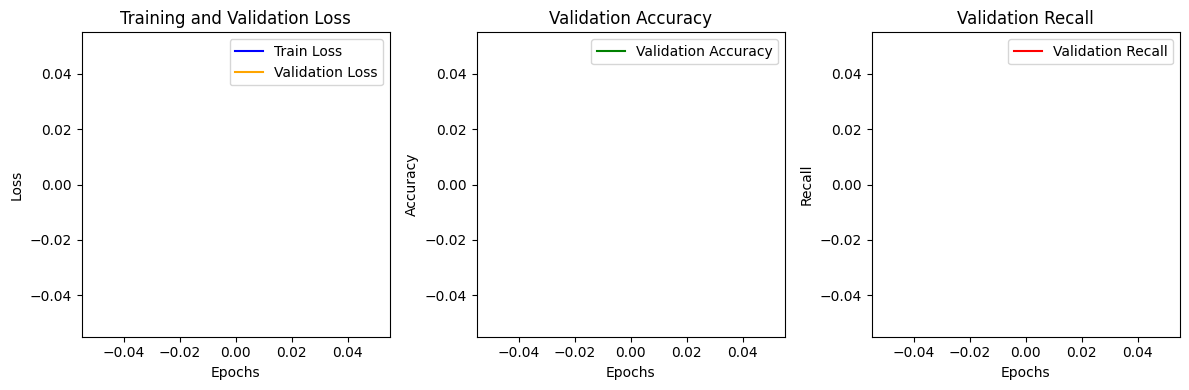

In [51]:
met_info = type_plasma_model.output_met()
met_info

In [52]:
idx_info = type_plasma_model.idx_output()
idx_info

{0: 'Calcium', 1: 'Uric acid', 2: 'Uric acid calcium'}

In [53]:
len(idx_info)

3

In [81]:
from Prediction_tool import Predict
from PIL import Image

In [82]:
type_plasma_model_test_model = "best_model.pth"#"averaged_model.pth" #"type_plasma_model.pth"

In [83]:
test_df = test_df.reset_index(drop=True)
test_df

,Path,Type,label,Predicted_label,Predicted_type,Confidence,prob_Calcium,prob_Uric acid,prob_Uric acid calcium
0,Calcium/Stone 9/10009_495_plasma.png,Calcium,0,0.0,Calcium,0.999339,0.999339,0.000219,0.000442
1,Calcium/Stone 18/10018_658_plasma.png,Calcium,0,0.0,Calcium,0.992559,0.992559,0.006169,0.001273
2,Uric acid/Pure uric acid/Stone 13/10013_2244_p...,Uric acid,1,1.0,Uric acid,0.977806,0.005954,0.977806,0.016240
3,Calcium/Stone 9/10009_1696_plasma.png,Calcium,0,0.0,Calcium,0.999914,0.999914,0.000022,0.000064
4,Calcium/Stone 9/10009_1864_plasma.png,Calcium,0,0.0,Calcium,0.994529,0.994529,0.004016,0.001455
...,...,...,...,...,...,...,...,...,...
1662,Calcium/Stone 9/10009_1453_plasma.png,Calcium,0,0.0,Calcium,0.999918,0.999918,0.000035,0.000046
1663,Calcium/Stone 9/10009_508_plasma.png,Calcium,0,0.0,Calcium,0.999010,0.999010,0.000448,0.000542
1664,Calcium/Stone 9/10009_1715_plasma.png,Calcium,0,0.0,Calcium,0.998184,0.998184,0.000570,0.001246
1665,Uric acid/Pure uric acid/Stone 2/10002_910_pla...,Uric acid,1,0.0,Calcium,0.606026,0.606026,0.282985,0.110989


In [84]:
test_df["Type"].value_counts()

Type
Calcium              1072
Uric acid             491
Uric acid calcium     104
Name: count, dtype: int64

In [85]:
test_df.iloc[0].Path

'Calcium/Stone 9/10009_495_plasma.png'

In [86]:
type_plasma_model_predict = Predict(num_classes=len(idx_info), model_path = type_plasma_model_test_model)
type_plasma_model_predict_result = type_plasma_model_predict.predict_single_patch(test_df.iloc[0].Path)
type_plasma_model_predict_result

Using device: cuda
GPU: NVIDIA GeForce RTX 4070 Laptop GPU


{'predicted_class': 0,
 'confidence': 0.9993388056755066,
 'probabilities': array([9.9933881e-01, 2.1901024e-04, 4.4218212e-04], dtype=float32)}

In [87]:
idx_info

{0: 'Calcium', 1: 'Uric acid', 2: 'Uric acid calcium'}

In [88]:
# Укажите device='cuda' вместо 'gpu'
type_plasma_model_predict = Predict(
    num_classes=len(idx_info),
    model_path=type_plasma_model_test_model,
    device='cuda'  # Исправлено на 'cuda'
)

# Пример предсказания
result = type_plasma_model_predict.predict_single_patch(test_df.iloc[0].Path)
print(result)

Using device: cuda
GPU: NVIDIA GeForce RTX 4070 Laptop GPU
{'predicted_class': 0, 'confidence': 0.9993388056755066, 'probabilities': array([9.9933881e-01, 2.1901024e-04, 4.4218212e-04], dtype=float32)}


In [89]:
idx_info

{0: 'Calcium', 1: 'Uric acid', 2: 'Uric acid calcium'}

# Теперь поработаем с test_df, заполним его

In [90]:
from tqdm import tqdm

In [91]:
complited_data["Type"].value_counts()

Type
Calcium              7144
Uric acid            3274
Uric acid calcium     692
Name: count, dtype: int64

In [92]:
for i, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Processing images"):
    image_path = row["Path"]
    
    result = type_plasma_model_predict_result = type_plasma_model_predict.predict_single_patch(image_path)
    
    predicted_label = result['predicted_class']
    probabilities = result['probabilities'] 
    
    test_df.at[i, 'Predicted_label'] = int(predicted_label)
    test_df.at[i, 'Predicted_type'] = idx_info[predicted_label]
    test_df.at[i, 'Confidence'] = result["confidence"]
    test_df.at[i, 'prob_Calcium'] = probabilities[0]
    #test_df.at[i, 'prob_Cystine'] = probabilities[1]
    test_df.at[i, 'prob_Uric acid'] = probabilities[1]
    test_df.at[i, 'prob_Uric acid calcium'] = probabilities[2]
    

    
    
    
    


Processing images: 100%|██████████| 1667/1667 [00:08<00:00, 190.05it/s]


In [67]:
test_df

,Path,Type,label,Predicted_label,Predicted_type,Confidence,prob_Calcium,prob_Uric acid,prob_Uric acid calcium
0,Calcium/Stone 9/10009_495_plasma.png,Calcium,0,0.0,Calcium,0.999339,0.999339,0.000219,0.000442
1,Calcium/Stone 18/10018_658_plasma.png,Calcium,0,0.0,Calcium,0.992559,0.992559,0.006169,0.001273
2,Uric acid/Pure uric acid/Stone 13/10013_2244_p...,Uric acid,1,1.0,Uric acid,0.977806,0.005954,0.977806,0.016240
3,Calcium/Stone 9/10009_1696_plasma.png,Calcium,0,0.0,Calcium,0.999914,0.999914,0.000022,0.000064
4,Calcium/Stone 9/10009_1864_plasma.png,Calcium,0,0.0,Calcium,0.994529,0.994529,0.004016,0.001455
...,...,...,...,...,...,...,...,...,...
1662,Calcium/Stone 9/10009_1453_plasma.png,Calcium,0,0.0,Calcium,0.999918,0.999918,0.000035,0.000046
1663,Calcium/Stone 9/10009_508_plasma.png,Calcium,0,0.0,Calcium,0.999010,0.999010,0.000448,0.000542
1664,Calcium/Stone 9/10009_1715_plasma.png,Calcium,0,0.0,Calcium,0.998184,0.998184,0.000570,0.001246
1665,Uric acid/Pure uric acid/Stone 2/10002_910_pla...,Uric acid,1,0.0,Calcium,0.606026,0.606026,0.282985,0.110989


# Посчитаем метрики

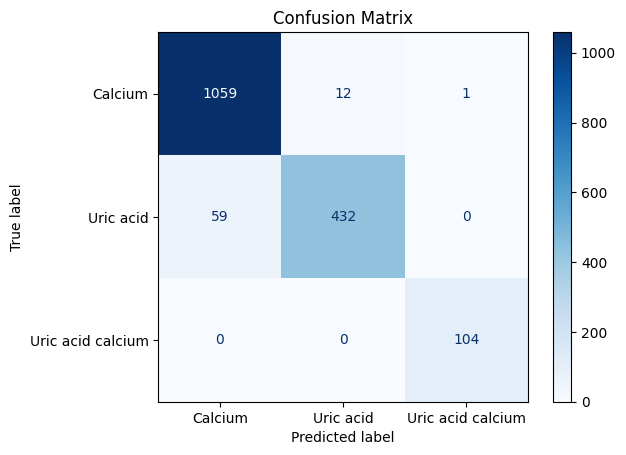

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test_df['label'], test_df['Predicted_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=list(idx_info.values()))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [69]:
cm

array([[1059,   12,    1],
       [  59,  432,    0],
       [   0,    0,  104]])

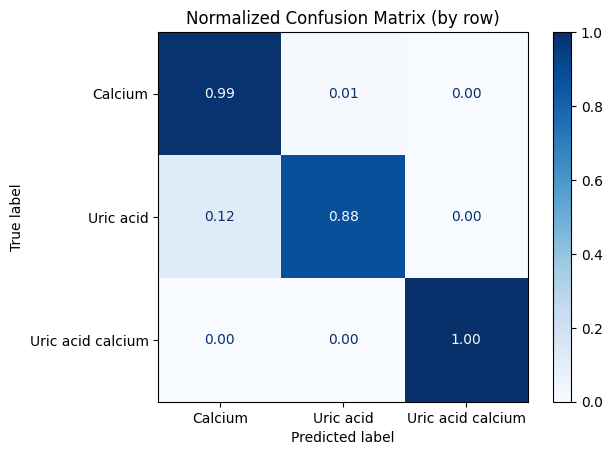

Normalized CM (row-wise):
[[0.988 0.011 0.001]
 [0.12  0.88  0.   ]
 [0.    0.    1.   ]]


In [80]:


# Рассчитываем обычную матрицу ошибок
cm = confusion_matrix(test_df['label'], test_df['Predicted_label'])

# Нормируем матрицу по строкам (верные метки)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Создаем визуализацию с частотами
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_normalized,
    display_labels=list(idx_info.values())
)

# Настраиваем формат отображения (два знака после запятой)
disp.plot(cmap='Blues', values_format='.2f')  # Используйте '.1%' для процентов

plt.title('Normalized Confusion Matrix (by row)')
plt.show()

# Выводим числовое представление матрицы (опционально)
print("Normalized CM (row-wise):")
print(np.round(cm_normalized, 3))

In [70]:
from sklearn.metrics import classification_report

print(classification_report(
    test_df['label'],
    test_df['Predicted_label'],
    target_names=list(idx_info.values())
))

                   precision    recall  f1-score   support

          Calcium       0.95      0.99      0.97      1072
        Uric acid       0.97      0.88      0.92       491
Uric acid calcium       0.99      1.00      1.00       104

         accuracy                           0.96      1667
        macro avg       0.97      0.96      0.96      1667
     weighted avg       0.96      0.96      0.96      1667



#  Cystine Их очень мало!!!  Можно ли побольше выделить????

In [71]:
Cystine_df.shape

(409, 2)

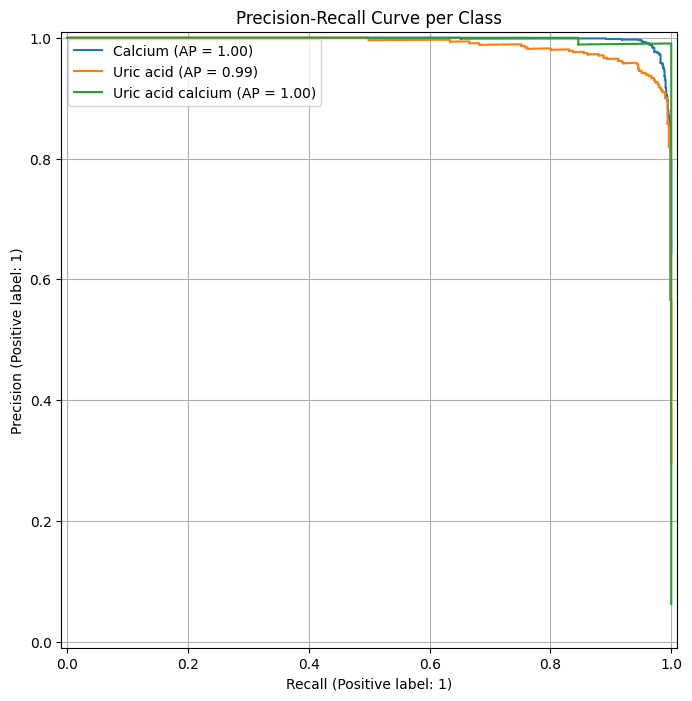

In [72]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize

# Преобразуем метки в one-hot encoding
y_true = label_binarize(test_df['label'], classes=[0,1,2,3])
y_score = test_df[['prob_Calcium', 'prob_Uric acid', 'prob_Uric acid calcium']].values

# Создаем subplot для каждого класса
fig, ax = plt.subplots(figsize=(10, 8))
for i, cls in enumerate(idx_info.values()):
    PrecisionRecallDisplay.from_predictions(
        y_true[:, i],
        y_score[:, i],
        name=f"{cls}",
        ax=ax
    )
ax.set_title("Precision-Recall Curve per Class")
ax.legend(loc='best')
ax.grid()
plt.show()

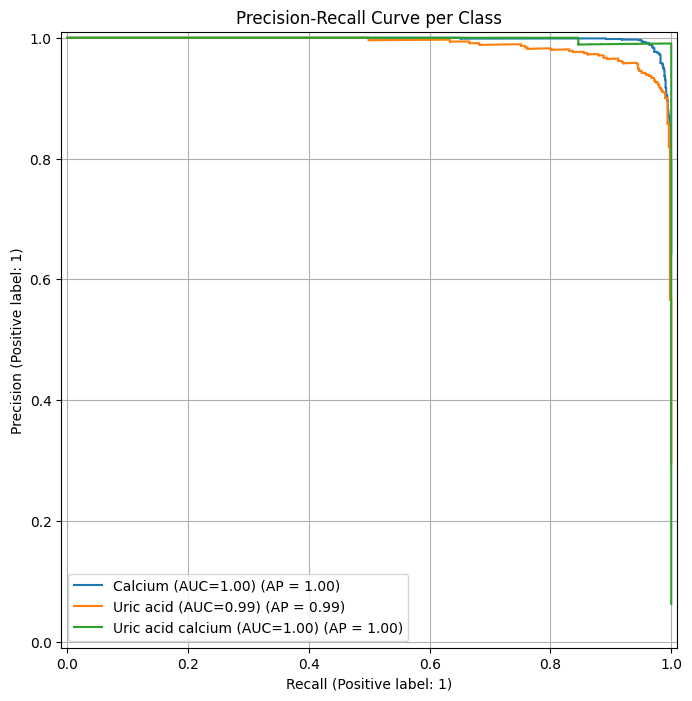

In [73]:
from sklearn.metrics import auc, precision_recall_curve

fig, ax = plt.subplots(figsize=(10, 8))
for i, cls in enumerate(idx_info.values()):
    precision, recall, _ = precision_recall_curve(y_true[:, i], y_score[:, i])
    pr_auc = auc(recall, precision)
    
    PrecisionRecallDisplay.from_predictions(
        y_true[:, i],
        y_score[:, i],
        name=f"{cls} (AUC={pr_auc:.2f})",  # Добавляем AUC в легенду
        ax=ax
    )
ax.set_title("Precision-Recall Curve per Class")
ax.legend(loc='best')
ax.grid()
plt.show()

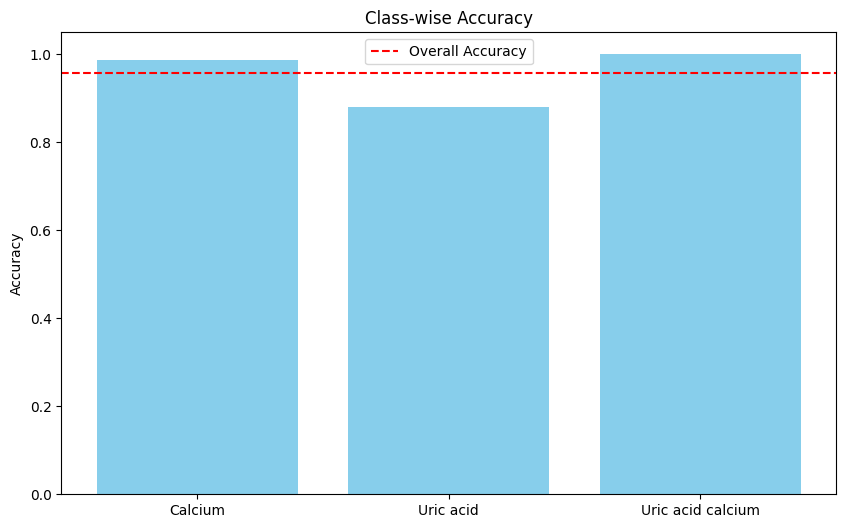

In [74]:
import numpy as np

# Вычисляем accuracy для каждого класса
class_acc = {}
for label, name in idx_info.items():
    class_samples = test_df[test_df['label'] == label]
    correct = (class_samples['label'] == class_samples['Predicted_label']).sum()
    class_acc[name] = correct / len(class_samples)

# Визуализация
plt.figure(figsize=(10, 6))
plt.bar(class_acc.keys(), class_acc.values(), color='skyblue')
plt.axhline(y=test_df['label'].eq(test_df['Predicted_label']).mean(), 
            color='r', 
            linestyle='--', 
            label='Overall Accuracy')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.ylim(0, 1.05)
plt.legend()
plt.show()

In [89]:
test_df.to_excel("test_df.xlsx")

In [90]:
#type_plasma_model.clear_memory()

In [91]:
Unclass_df

,Path,Type
0,Unclass/Stone 37/10037_760_plasma.png,Unclass
1,Unclass/Stone 37/10037_1110_plasma.png,Unclass
2,Unclass/Stone 37/10037_1060_plasma.png,Unclass
3,Unclass/Stone 37/10037_1490_plasma.png,Unclass
4,Unclass/Stone 37/10037_1450_plasma.png,Unclass
...,...,...
4202,Unclass/Stone 82/10082_750_plasma.png,Unclass
4203,Unclass/Stone 82/10082_1540_plasma.png,Unclass
4204,Unclass/Stone 82/10082_560_plasma.png,Unclass
4205,Unclass/Stone 82/10082_500_plasma.png,Unclass


In [76]:
for i, row in tqdm(Unclass_df.iterrows(), total=len(Unclass_df), desc="Processing images"):
    image_path = row["Path"]
    
    result = type_plasma_model_predict_result = type_plasma_model_predict.predict_single_patch(image_path)
    
    predicted_label = result['predicted_class']
    probabilities = result['probabilities'] 
    
    Unclass_df.at[i, 'Predicted_label'] = int(predicted_label)
    Unclass_df.at[i, 'Predicted_type'] = idx_info[predicted_label]
    Unclass_df.at[i, 'Confidence'] = result["confidence"]
    Unclass_df.at[i, 'prob_Calcium'] = probabilities[0]
    #Unclass_df.at[i, 'prob_Cystine'] = probabilities[1]
    Unclass_df.at[i, 'prob_Uric acid'] = probabilities[1]
    Unclass_df.at[i, 'prob_Uric acid calcium'] = probabilities[2]
    

Processing images: 100%|██████████| 4207/4207 [00:20<00:00, 202.60it/s] 


In [77]:
Unclass_df.to_excel("Unclass_df.xlsx")

In [78]:
Unclass_df

,Path,Type,Predicted_label,Predicted_type,Confidence,prob_Calcium,prob_Cystine,prob_Uric acid,prob_Uric acid calcium
0,Unclass/Stone 37/10037_760_plasma.png,Unclass,0.0,Calcium,0.999485,0.999485,0.000407,0.000407,1.087435e-04
1,Unclass/Stone 37/10037_1110_plasma.png,Unclass,0.0,Calcium,0.999666,0.999666,NaN,0.000187,1.465595e-04
2,Unclass/Stone 37/10037_1060_plasma.png,Unclass,0.0,Calcium,0.999858,0.999858,NaN,0.000126,1.627933e-05
3,Unclass/Stone 37/10037_1490_plasma.png,Unclass,0.0,Calcium,0.996585,0.996585,NaN,0.003411,3.888201e-06
4,Unclass/Stone 37/10037_1450_plasma.png,Unclass,0.0,Calcium,0.999956,0.999956,NaN,0.000043,8.065605e-07
...,...,...,...,...,...,...,...,...,...
4202,Unclass/Stone 82/10082_750_plasma.png,Unclass,0.0,Calcium,0.999938,0.999938,NaN,0.000018,4.346370e-05
4203,Unclass/Stone 82/10082_1540_plasma.png,Unclass,0.0,Calcium,0.999857,0.999857,NaN,0.000137,5.741976e-06
4204,Unclass/Stone 82/10082_560_plasma.png,Unclass,0.0,Calcium,0.999219,0.999219,NaN,0.000345,4.358285e-04
4205,Unclass/Stone 82/10082_500_plasma.png,Unclass,0.0,Calcium,0.999756,0.999756,NaN,0.000127,1.165684e-04


Predicted_label
0.0    2887
1.0     571
2.0     507
3.0     242
Name: count, dtype: int64

In [79]:
Unclass_df["Predicted_label"].value_counts()

Predicted_label
0.0    3938
2.0     176
1.0      93
Name: count, dtype: int64